In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('SBIN.NS.csv')

In [2]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
61,2020-09-24,181.100006,181.800003,175.500000,176.350006,176.350006,46114798
62,2020-09-25,179.000000,182.750000,176.149994,182.199997,182.199997,46550127
63,2020-09-28,184.000000,188.149994,183.350006,187.250000,187.250000,41921548
64,2020-09-29,188.500000,188.949997,183.250000,185.050003,185.050003,35688726
65,2020-09-30,185.050003,186.800003,182.399994,185.399994,185.399994,37641083


mu = 2.981e-04	 sigma^2 = 4.965e-04

Date   	 Expect	  Real	  Error
-----------------------------------
Oct 7 	 185.40	 190.70	 2.78 %
Oct 14	 185.99	 200.05	 7.03 %
Oct 21	 186.57	 203.75	 8.43 %


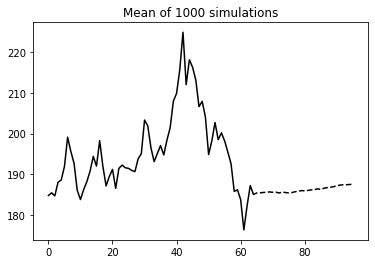

In [3]:
NUM_SIMS = 1000

def predict(prices, time, num_sims):
    prices = np.array(prices)
    us = np.log(prices[1:]/prices[:-1]) 
    n = len(prices) - 1
    Eu = sum(us)/float(n)
    sigma2 = np.sum((us - Eu)**2)/(n-1)
    mu = Eu + sigma2/2.0
    
    print(f'mu = {mu:.3e}\t sigma^2 = {sigma2:.3e}')
    
    predictions = []
    for _ in range(num_sims):
        pred = []
        lS = prices[-1]
        for i in range(time):
            S = lS * np.exp((mu - sigma2/2) + np.sqrt(sigma2)*np.random.normal())
            pred.append(S)
            lS = S
        predictions.append(pred)
        
    predictions = np.array(predictions)
    predictions = np.mean(predictions, axis=0)
    return predictions

prices = data['Close'].to_numpy()
plt.plot(range(len(prices)), prices, 'k')

# gives average prediction for `num_sims` simulations
pred = predict(prices, time = 30, num_sims = NUM_SIMS)


plt.plot(range(len(prices), len(prices) + len(pred)), pred, 'k--')
plt.title(f'Mean of {NUM_SIMS} simulations')

# actual values 
# oct 7     190.70
# oct 14    200.05
# oct 21    203.75

actual = {6 : 190.70, 13: 200.05, 20: 203.75}

# percentage error
print('\nDate   \t Expect\t  Real\t  Error')
print('-'*35)
print(f'Oct 7 \t{pred[6] : .2f}\t {actual[6] :.2f}\t {abs(100.0*(pred[6]-actual[6])/actual[6]):.2f} %')
print(f'Oct 14\t{pred[13]: .2f}\t {actual[13]:.2f}\t {abs(100.0*(pred[13]-actual[13])/actual[13]):.2f} %')
print(f'Oct 21\t{pred[20]: .2f}\t {actual[20]:.2f}\t {abs(100.0*(pred[20]-actual[20])/actual[20]):.2f} %')
